## Import Libraries

In [1]:
%matplotlib inline
import numpy as np
from scipy.signal import savgol_filter
import peakutils # package avaiable in Pip, can do gaus fitig and local maxima fiting
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os
import sys
# importing from the code specific module
from XRD_Analyses_Modul import json_data_read_reduce, peak, relevant, irrelevant, ox_index, plane_count
version = '1.5'

In [2]:
#Sets the cell width to certan procentage
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

# Sample Selection and Read in of the Folder and Fitting Data

In [3]:
#Folder = '26WCrY_Sa11'   # Folder/data -> where all data files which shall be used are found (and no other files)
#Folder = '27WCrY_Sa04'

#Folder = '16WCrY_Sa'
#Folder = '33WCrY'

######################  Folder = 'YReihe'
#Folder = 'NonOx'
#Folder = '34WCrY_Sa06'
#Folder = '01WCrY_3hMa'

###################### PHD Thesis
#Folder = 'W_powder'
#Folder = 'Powder_overview'  #finished!! check double put in
#Folder = 'Bulk_Powder'     #finished

#Folder = 'LowpO2'          #finished
#Folder = 'WCr_WCrY'        #finished
#Folder = 'CrReihe'         #finished
#Folder = 'YReihe'          #finished

#Folder = '1200C'           #finished
#Folder = 'Phasen'          #finished




#Folder = 'LowPO2_bulk'     #finisched
Folder = 'Bulk_rough_smoth'#finished
#Folder = 'Bulk'            #finished

#Folder = 'Bulk_thin_comp'  #finished


CurrentDirectory = os.curdir # defines the current file where this code is saved
meas = os.listdir('%s/%s/data'%(CurrentDirectory,Folder)) # define list of data sets in the folder
dataSets = []
meas.sort() # sorting alphabetecly the file names
sec = []

for i in range (0,len(meas)): # create data arrays
    data = np.genfromtxt('%s/data/%s'%(Folder,meas[i]), skip_header = 1)
    sec.append(data[:,1].max()) ##Defining secons from the highest peak so peaks get highest peaks without overlapping
    dataSets.append(data)

print meas

['00_Fast2064_03_beforeOx_exported.xy', '01_Fast2064_01_afterOx-1273K,44h,ArO2,standardgrinding_exported.xy', '02_BB_FAST2064_07_ox_exported.xy']


### Test if import wokrs
Only works if files are available on your hardrive, download from e.g. https://www.materialsproject.org/materials/mp-19005/

In [4]:
Y6WO12 = json_data_read_reduce('daten_bank/Y6WO12_mp-19005_xrd_Cu.json')
print 'Y6WO12', len(Y6WO12), Y6WO12

WO2 = json_data_read_reduce('daten_bank/WO2_tetra_mp-19372_xrd_Cu.json')
print 'WO2', len(WO2), WO2

Y6WO12 6 [28.42636114 29.20471251 33.62374459 47.78369588 48.78884306 57.43435056]
WO2 4 [26.42770112 33.12694086 37.72155935 51.06375725]


## Creating data base for oxide fitting

# Peak Database

In [5]:
#=======================================================================================================#
#    Peak data base for all metal and oxides: ICDD-Database (2014). PDF2014 PDF-2, www.icdd.com.        #
#    with the exception of Y6WO12 which is from: Persson, K. (2014).                                    #
#    Materials data on y6wo12 (sg:148) by materials project.                                            #
#=======================================================================================================#

W = [40.265,58.276,73.198,87.024]
Cr = [44.393, 64.5447, 81.724, 98.0349] #self fitted only if needed
Cr2O3 = [24.494,33.597,36.196, 39.749, 41.480, 44.194, 50.220, 54.852, 57.111, 58.397,
         63.449, 65.106, 72.944, 73.329, 76.851, 79.056,
         82.092, 84.239, 85.682, 86.539, 90.202, 95.328]#  33.597
WO3 = [23.083,23.707,24.099,25.956,26.587,28.776,33.331,34.022,35.525,41.524,44.880,45.354,47.228,48.431,49.326
       ,50.079,50.494,53.480,53.683,54.302,55.116]# 33.640  ,54.794,55.404]#,55.844,59.472,60.242,60.810,62.121,62.446]
#WO283 = [23.485, 23.181, 33.242, 48.077, 53.615, 59.388, 54.025]
W8O21 = [23.498, 26.038, 26.882, 31.316, 48.064, 36.000, 39.521]
WO279 = [23.512,28.214,37.044,48.093,56.694]

WO2 = [26.42770112, 33.12694086, 37.72155935, 51.06375725]

Cr2WO6 = [20.008,21.827,27.513,34.258,36.137,39.308,44.488,45.411,54.461,56.813,62.834,64.260,69.222,70.125,89.778]
YO = [29.410]#,34.038,48.888,58.075]
#CrWO4 = [19.154, 26.750, 27.681, 30.624, 36.373, 38.871, 41.089, 42.994, 44.301
#         ,50.256, 53.751, 54.794, 55.080, 57.207, 62.728, 63.736, 64.228, 68.653, 70.299, 70.663]#]

Y6WO12 = [28.42636114, 29.20471251, 33.62374459, 47.78369588, 48.78884306, 57.43435056]

# Expamples for the import function for json files form material project:
# Y2WO6 = json_data_read_reduce('daten_bank/Y2WO6_mp-565796_xrd_Cu.json')
# WO2 = json_data_read_reduce('daten_bank/WO2_tetra_mp-19372_xrd_Cu.json')
#Y6WO12 = json_data_read_reduce('daten_bank/Y6WO12_mp-19005_xrd_Cu.json')
#Y2WO6_2 = json_data_read_reduce('daten_bank/Y2WO6_2_mp-510132_xrd_Cu.json')


# filling vlaues into dic to call at key of oxide in the fitting loop
dic = { 'Cr$_2$O$_3$':np.sort(Cr2O3),'Cr$_2$WO$_6$':np.sort(Cr2WO6)
       ,'Y$_6$WO$_{12} ^*$' : Y6WO12
       #,'CrWO$_4$':CrWO4
       , 'WO$_3$': np.sort(WO3)
       ,'WO$_{2.79}$':np.sort(WO279)
       ,'WO$_2$':WO2
       }#'Y$_2$O$_3$':[29.410,34.038,48.888,58.075]#WO283+W8O21+
#'Cr':[44.393,81.724,64.5447],#'W' : [40.265,58.276,73.198,87.024],

#dic for maker 'name': [marker,'traffic-light-color',marker ofset (0 to 0.2) to get red at top yellow, and green]
dic_marker =  { 'Cr$_2$O$_3$':['h','g',0.]
               , 'Y$_2$O$_3$': ['.','g',0.]
               , 'Cr$_2$WO$_6$':['D','y',0.1]
               , 'CrWO$_4$':['*','y',0.1]
               , 'Y$_2$WO$_6 ^*$': ['d','y',0.1]
               , 'Y$_6$WO$_{12} ^*$': ['v','y',0.1]
               , 'WO$_3$': ['D','r',0.2]
               , 'WO$_{2.79}$':['^','r',0.2], 'WO$_2$':['v','r',0.2]
               , 'W$_{8}$O$_{21}^*$':['p','r',0.2] 
               }

print dic_marker

{'Cr$_2$O$_3$': ['h', 'g', 0.0], 'WO$_2$': ['v', 'r', 0.2], 'WO$_3$': ['D', 'r', 0.2], 'Y$_2$WO$_6 ^*$': ['d', 'y', 0.1], 'WO$_{2.79}$': ['^', 'r', 0.2], 'W$_{8}$O$_{21}^*$': ['p', 'r', 0.2], 'Cr$_2$WO$_6$': ['D', 'y', 0.1], 'Y$_2$O$_3$': ['.', 'g', 0.0], 'CrWO$_4$': ['*', 'y', 0.1], 'Y$_6$WO$_{12} ^*$': ['v', 'y', 0.1]}


In [6]:
name = range(len(meas)) #produce list with length of measurement

for i in range(len(meas)):
    name[i] = meas[i].split('_',1)[1][:-12]#[1:3][0]#search for the first occurence of '_' splits it. take the second part and cut of -12 from the end
    print name[i]

Fast2064_03_beforeOx
Fast2064_01_afterOx-1273K,44h,ArO2,standardgrinding
BB_FAST2064_07_ox


## Default values for the different folders and list of exceptions

In [7]:
#Default sizes
minpeak = None 
print minpeak
peakhight = 140.0 # hight of the resulting peak
minimal_count = 2 # minimal count of peaks for xrd phase for vergards concentration caculation
scale = peakhight*1.28
Smooth = 2 #devides and makes the the smoothing window smaller if chosen higher

# Both oxide and alloy fitting are active as default
oixdes = True
metal = True
#No oxide phase shell be fitted for [list of exeptions]
list_of_none_oxed = ['W','Cr','3.0$\,$h \nLow $p_{\mathrm{O}_2}$','0.0$\,$h'#,u'FAST7 initial'
                     ,'As produced']
#where not metal phase is measured (shielded by the thick oxide layer)
list_of_none_metal = ['FAST7 rough','FAST6 humid 251$\,$h', u'CEIT \nW-10Cr-0.5Y \n10 h ox',u'FAST4']
# list of exceptions when a single additional usfull peak is to be analyse the alloy composition
exeption = [u'W-11.4Cr-0.6Y\n 3.5$\,$µm 2$\,$h Ox', u'W-11.4Cr-0.6Y\n 3.5 µm 2$\,$h Ox', 
            '2.0$\,$h', 'FAST7',u'FAST7 initial', u'FAST7 befor Ox',u'FAST7 3$\,$h 1273$\,$K',
            'FAST6',u'FAST6', u'FAST6 3523$\,$µm\n 44$\,$h Ox', '16$\,$h', '3$\,$h',
            '1.25$\,$h \n(stage 2)', '2.0$\,$h \n(stage 2)',
            u'W-Cr-Y, 3$\,$h', u'As produced', '0.1$\\,$h \n(stage 1)',
            'W-11.8Cr-0.3Y'
           ]#, '0.0$\,$h']#, u'W-Cr-Y, 3$\,$h']
# if the gausian second fittig methode is not wanted (less precize fitting)
non_gausian_metal = ['40$\,$h']

#Optional defining of names and change of default values from above if needed:
if Folder == 'WCr_WCrY':
    name[0] = 'W-11.8Cr-0.3Y' #16WCrY_Sa01
    name[1] = 'W-10.3Cr' #01WCr_Sa07
    dic['W$_{8}$O$_{21}^*$'] = np.sort(W8O21)
    minimal_count = 1         

if Folder == 'YReihe':
    name[0] = 'W-11.6Cr-0.4Y' #27WCrY_Sa08
    name[1] = 'W-11.4Cr-0.6Y' #33WCrY_Sa01
    name[2] = 'W-12.3Cr-0.7Y' #26WCrY_Sa07
    minimal_count = 0         # for all samples all alloy peaks are considered

if Folder == '1200C':
    name[0] = 'W-11.1Cr'#'W-11.1Cr'
    name[1] = 'W-13.5Cr-0.7Y'

if Folder == 'Powder_overview': # this one is the more default one use for other parameters as well..
    name[0] = 'W'
    name[7] = 'Cr'
    name[1] = '3$\,$h'
    name[2] = '16$\,$h'
    name[3] = '40$\,$h'
    name[4] = '60$\,$h-0.6Y'
    name[5] = '60$\,$h-1.0Y'
    name[6] = '60$\,$h-1.5Y'
    Xmin = 30.
    Xlim = 110. # maximal shown X value
    oixdes = False
    #Metal
    minpeak2 = 6.#
    peaknumber2 = 100.#65
    minimal_count = 1
    
if Folder == 'Bulk':
    name[0] = 'FAST3'
    name[1] = u'FAST4'
    name[2] = u'FAST6'
    name[3] = u'FAST7'
    dic['W$_{8}$O$_{21}^*$'] = sort(W8O21)
    #name[4] = u'CEIT \nW-10Cr-0.5Y \n10 h ox'
    minimal_count = 2
    minpeak2 = 4#6#0.08
    peaknumber2 = 80
    
if Folder == 'Bulk_Powder':
    name[0] = '60$\,$h-0.6Y'
    name[1] = 'FAST1 40$\,$h'
    name[2] = 'FAST2a'
    name[3] = 'FAST3'
    name[4] = 'FAST4 '
    name[5] = 'FAST5'
    name[6] = 'FAST6'
    name[7] = 'FAST7'
    oixdes = False
    minimal_count = 2
       
if Folder == 'W_powder':
    name[0] = 'W'
    hight = 70
    oixdes = False
    
if Folder == 'Phasen':
    name[0] = u'0.0$\,$h'#
    name[1] = '0.1$\,$h \n(stage 1)'
    name[2] = '1.25$\,$h \n(stage 2)'
    name[3] = '2.0$\,$h \n(stage 2)'
    name[4] = '3.0$\,$h \n(stage 3)'
    name[5] = '8.0$\,$h \n(stage 3)'
    minimal_count = 1

if Folder == 'LowpO2':
    name[2] = u'As produced'
    name[1] = u'W-Cr, 3$\,$h'
    name[0] = u'W-Cr-Y, 3$\,$h'
    oixdes = False
    minimal_count = 2

if Folder == 'CrReihe':
    name[0] = 'W-8.0Cr-0.6Y'  #30WCrY_Sa09
    name[1] = 'W-10.2Cr-0.6Y' #32WCrY_Sa04
    name[2] = 'W-11.4Cr-0.6Y' #33WCrY_Sa04
    name[3] = 'W-13.5Cr-0.7Y' #34WCrY_Sa03
    minimal_count = 0 #every peak is considered, here one have be carefull in the peak detection setting
    
if Folder == 'LowPO2_bulk':
    name[0] = u'FAST7 initial'
    name[1] = u'FAST7 3$\,$h 1273$\,$K'
    minpeak2 = 4#6#0.08
    peaknumber2 = 80
    oixdes = False
    minimal_count = 1

if Folder == 'Bulk_thin_comp':
    name[2] = u'W-11.4Cr-0.6Y\n 3.5$\,$µm 2$\,$h Ox'
    name[1] = u'W-13.5Cr-1.1Y\n 7.5$\,$µm 6$\,$h Ox'
    name[0] = u'FAST6 3523$\,$µm\n 44$\,$h Ox'
    minimal_count = 2
    minpeak2 = 4#6#0.08
    peaknumber2 = 80
    
if Folder == 'Bulk_rough_smoth':
    name[0] = u'FAST7 initial'
    name[1] = 'FAST7 standard'# 44 h Ox'
    name[2] = 'FAST7 rough'# 44 h Ox'
    #oxide
    minpeak = 0.045#0.08
    peaknumber = 200
    minpeak = [0.03,0.02,0.06]#*len(name)
    peaknumber = [150]*len(name)
    #metal
    minpeak2 = [10.]*len(name)#8.3#4#8.1##0.06#0.08 #percent of maximal peak
    peaknumber2 = [100.]*len(name)#65

    
# make iterable sorted list for plotting of oxide specias
dic_keys = dic.keys()
dic_keys = np.sort(dic_keys)
print dic_keys

if oixdes == True:
    start = 20
    stop = 100
else:
    start = 39
    stop = 95
print 'SETTINGS:\n'
print Folder, name
print 'start-stop',start, stop
print 'oxid:', oixdes
print 'metal:', metal

None
['Cr$_2$O$_3$' 'Cr$_2$WO$_6$' 'WO$_2$' 'WO$_3$' 'WO$_{2.79}$'
 'Y$_6$WO$_{12} ^*$']
SETTINGS:

Bulk_rough_smoth [u'FAST7 initial', 'FAST7 standard', 'FAST7 rough']
start-stop 20 100
oxid: True
metal: True


## Plot Settings

In [8]:
%config InlineBackend.figure_format='svg'
# Update the matplotlib configuration parameters:
plt.matplotlib.rcParams.update({'font.size': 14, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
plt.matplotlib.rcParams['svg.fonttype'] = 'none'

from matplotlib import rc
rc('lines', lw=1.5)
if len(name)>8:
    color= plt.cm.tab10(np.linspace(0,1,len(name)))#Dark2
else:
    color= plt.cm.Dark2(np.linspace(0,1,len(name)))
    #color= plt.cm.inferno(np.linspace(0,1,len(name)+2))
    
#Automatic figure hight setting by number of lines
print len(name)
if len(name)<5:
    hight = len(name)*2.
elif len(name)<7:
    hight = len(name)*1.4
else:
    hight = len(name)*1.25

rc('figure', figsize=(6.2, hight))

print hight

3
6.0


# Peak fitting
## Calculate Cr content in W-Cr phase from peakshift relative to the tungsten peak

In [9]:
#Default values
aCr = 2.8846#2.8846#2.885 # lattice constant chromium in angstrom 288.46 
aW = 3.16  # lattice constant tungsten in angstrom
lambd = 1.54184 # wavelength of the x-ry Cu source in angstrom
atomicMassW = 183.84
atomicMassCr = 51.9961

# Check if fitt settings are aproriet for the sample investigated
### Change mindpeak and peaknumber variable for oxide fitting
For different peak fitting parameter, list can be filled
Current folder and samples:

In [10]:
print Folder
print name

Bulk_rough_smoth
[u'FAST7 initial', 'FAST7 standard', 'FAST7 rough']


# Oxides
Change **mindpeak** and **peaknumber** variable for oxides phase fitting, untill all visible peaks are fitted, but not more. Save pecific parameters for the folder or indidual samples in form of:
'if Folder == 'Folder_name':
    minpeak = [0.050]*len(meas) or [0.5,0.3...]'

FAST7 rough 20 pixel/° window = 11 0.05
<type 'numpy.ndarray'> [  37   71   97  135  151  168  252  287  325  373  388  428  489  513
  565  599  678  693  715  740  861  890  978  989 1003 1112 1139 1260
 1271 1403 1521 1533] 
[21.84075408 23.5321667  24.82559987 26.7160022  27.51196108 28.35766739
 32.53645149 34.27761153 36.16801386 38.55589049 39.30210194 41.29199913
 44.32659235 45.52053066 48.10739701 49.79880963 53.72885658 54.47506803
 55.56951148 56.81319723 62.83263623 64.27531169 68.65308551 69.20030724
 69.89677126 75.31924111 76.66242171 82.68186072 83.22908244 89.79574317
 95.66593989 96.26290905]
FAST7 standard 20 pixel/° window = 11 0.03


/usr/local/lib/python2.7/dist-packages/matplotlib/cbook.py:2649: UserWarning: Saw kwargs [u'c', u'color'] which are all aliases for u'color'.  Kept value from u'color'
  seen=seen, canon=canonical, used=seen[-1]))
/usr/local/lib/python2.7/dist-packages/peakutils/peak.py:216: UserWarning: Optimal parameters not found: Number of calls to function has reached maxfev = 800.
  warnings.warn(str(e))


<type 'numpy.ndarray'> [  71   91  151  169  274  327  399  412  432  608  701  775 1078 1361] 
[23.5321667  24.52711529 27.51196108 28.40741482 33.63089494 36.26750872
 39.84932367 40.49604025 41.49098885 50.24653649 54.87304746 58.55435727
 73.62782849 87.70635112]
FAST7 initial 20 pixel/° window = 11 0.02
<type 'numpy.ndarray'> [  93  155  170  200  243  303  341  354  370  386  405  423  439  452
  505  522  536  547  594  671  783  794  809  844  866  931  942 1083
 1105 1121 1148 1182 1322 1354 1379 1394 1408] 
[24.62661015 27.7109508  28.45716225 29.94958514 32.08872462 35.07357041
 36.96397274 37.61068933 38.4066482  39.20260708 40.14780825 41.04326198
 41.83922086 42.48593745 45.12255123 45.96825753 46.66472155 47.21194328
 49.55007248 53.38062457 58.95233671 59.49955843 60.24576988 61.98692992
 63.08137338 66.31495631 66.86217804 73.87656564 74.9710091  75.76696797
 77.11014858 78.80156119 85.76620136 87.35811912 88.60180486 89.34801631
 90.04448032]
Bulk_rough_smoth


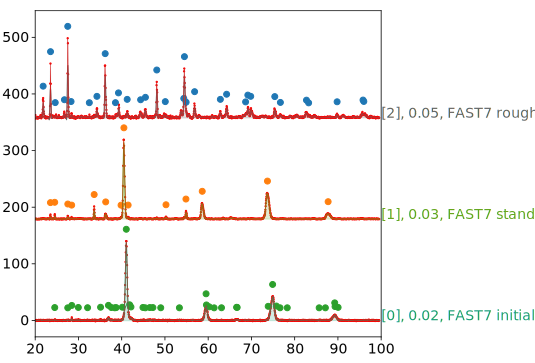

In [11]:
#default
minpeak = [0.05]*len(meas)
peaknumber = [150]*len(meas)

#HERE set your wanted values if default are not sufficient
if Folder == 'Bulk_rough_smoth':
    minpeak = [0.02,0.03,0.05]#*len(meas)
if Folder == 'Bulk_thin_comp':
    minpeak = [0.03,0.05,0.04]#*len(meas)
if Folder == 'Bulk':
    minpeak = [0.03]*len(meas)
    peaknumber = [150]*len(meas)
if Folder == 'Phasen':
    minpeak = [0.05]*len(meas)
    minpeak[3] = 0.08
if Folder == 'CrReihe':
    minpeak[3], minpeak[2], minpeak[0] = 0.02, 0.03, 0.04
if Folder == 'WCr_WCrY':
    minpeak[0] = 0.03
 
Smooth = 2
if oixdes == True:
    for i in reversed(range(0,len(meas))):
        x_all = dataSets[i][:,0]
        x = x_all[(start < x_all) & (x_all < stop)]
        y = peakhight/sec[i]*(dataSets[i][(start <x_all) & (x_all<stop),1])+scale*i
        ## smoothing the data for the fit, makes fiitig more reliable:
        window = (len(x)/(stop-start))/Smooth
        window = window if window%2 != 0 else window+1#checks is window is odd
        y_smooth = savgol_filter(y, window_length=window, polyorder=3)
        print name[i],len(x)/(stop-start),u'pixel/°', 'window =',window, minpeak[i]
    
        plt.plot(x,y_smooth,c=color[i],lw=1,label='smoothed data')
        plt.plot(x,y,c=color[i],lw=0.5,color='red')
    
        plt.scatter(x,y,s=2,c='red',label='data' if 'data' not in plt.gca().get_legend_handles_labels()[1] else '')
        #plt.axvline(x=26.16878048)
    
        plt.fill(x, y, zorder=10,color=color[i],alpha=0.2)
        plt.text(stop,peakhight/sec[i]*(dataSets[i][100,1])+scale*i, '[{}], {:.2f}, '.format(i,minpeak[i]) + name[i], color=color[i])#prints the name to the line
        #fitiing and ploting
        indexes = peakutils.indexes(y, thres=minpeak[i], min_dist=len(x)/peaknumber[i]) #finding peak index position /max(y)
        print type(indexes),indexes, '\n', x[indexes]
        peaks_x = peakutils.interpolate(x, y, ind=indexes, width = window)#gausian fit better presition
        peaks_x = np.where(np.abs(peaks_x-x[indexes])>1.,x[indexes],peaks_x)#check wrong fit
        #print name[i],peaks_x[6], y[ox_index(y[indexes],y)]
        
        #check if at given x value y value fits the data
    
        #x[Ox_index(peaks_x,x,uncertanty=[-0.02,0.02])]
        #scatter(x[Ox_index(peaks_x,x,uncertanty=[-0.02,0.02])],y[Ox_index(peaks_x,x,uncertanty=[-0.02,0.02])])
        if (oixdes==True):# and (name[i] not in list_of_none_oxed)
            plt.scatter(peaks_x,y[indexes]+0.15*peakhight)
        #print name[i], peaks_x

    plt.xlim(start, stop)

print Folder

# Metal/Alloy
Change **mindpeak2** and **peaknumber2** variable for alloy phase fitting, untill all visible peaks are fitted, but not more.

[2.1, 2, 2]


(20, 100)

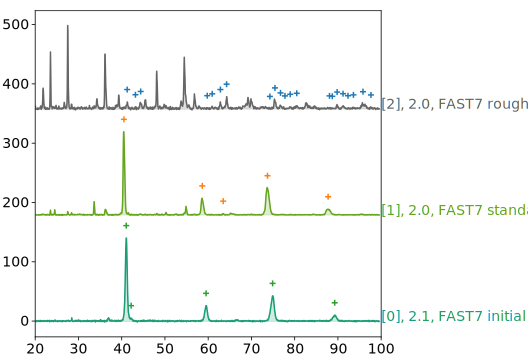

In [12]:
minpeak2 = [12]*len(name)#8.3#4#8.1##0.06#0.08 #percent of maximal peak
peaknumber2 = [90.]*len(name)#65

if Folder == 'Bulk_rough_smoth':
    minpeak2 = [2.1,2,2]#*len(name)
    peaknumber2 = [80.]*len(name)#65
if Folder == 'LowPO2_bulk':
    minpeak2 = [2, 2]#*len(name)# [1] 1.0 #percent of maximal peak
    peaknumber2 = [120.]*len(name)#65
if Folder == 'Bulk_thin_comp':
    minpeak2 = [8,14,10]#*len(name)#8.3#4#8.1##0.06#0.08 #percent of maximal peak
    peaknumber2 = [90.,110.,90.]#*len(name)#65
if Folder == 'Phasen':
    minpeak2[5],minpeak2[4], minpeak2[3], minpeak2[1], minpeak2[0] = 5, 3.5, 13, 7.0, 16
if Folder == 'Bulk_Powder':
    minpeak2 = [4.4]*len(name)#8.3#4#8.1##0.06#0.08 #percent of maximal peak
    minpeak2[0]= 5
    Smooth = 2 #deider for window for smoothing
if Folder == 'Powder_overview':
    minpeak2 = [6]*len(name)#8.3#4#8.1##0.06#0.0,8 #percent of maximal peak
    minpeak2[1], minpeak2[2], minpeak2[3], minpeak2[6] , minpeak2[7] = 2, 3.5, 5, 8,4
    peaknumber2[3] = 80
if Folder == 'Bulk':
    minpeak2 = [6]*len(meas)
if Folder == 'LowpO2':
    minpeak2 = [6.5]*len(name)#8.3#4#8.1##0.06#0.08 #percent of maximal peak
    minpeak2[2] = 16
    #Smooth = 3 #??
if Folder == 'CrReihe':
    minpeak2 = [12]*len(name)
if Folder == 'YReihe':
    minpeak2[0] = 6
if Folder == 'WCr_WCrY':
    minpeak2[1] = 6
    minpeak2[0] = 4
    
print minpeak2

for i in reversed(range(0,len(meas))):
    x_all = dataSets[i][:,0]
    x = x_all[(start < x_all) & (x_all < stop)]
    y = peakhight/sec[i]*(dataSets[i][(start <x_all) & (x_all<stop),1])+scale*i
    
    # smoothing data
    window = (len(x)/(stop-start))/Smooth
    window = window if window%2 != 0 else window+1 # checks is window is odd
    y_smooth = savgol_filter(y, window_length=window, polyorder=3)
    plt.plot(x,y,c=color[i])
    plt.fill(x, y, zorder=10,color=color[i],alpha=0.2)
    #prints the index, minpeak2 value and name to the line in the plt.plot
    plt.text(stop,peakhight/sec[i]*(dataSets[i][100,1])+scale*i, '[{}], {:.1f}, '.format(i, minpeak2[i]) + name[i], color=color[i])
    
    if (metal == True):# and (name[i] not in list_of_none_metal):#can be turned on if filter list should apply
        indexes = peakutils.indexes(y_smooth, thres=minpeak2[i]/peakhight, min_dist=len(x)/peaknumber2[i])
        #finding peak index position /max(y)
        peaks_x2 = peakutils.interpolate(x, y_smooth, ind=indexes, width=window)#gausian refit for better precision
        if name[i] in non_gausian_metal:
             peaks_x2 = x[indexes]
        peaks_x2 = np.where(np.abs(peaks_x2-x[indexes])>1.,x[indexes],peaks_x2)#check wrong fit
        aWCr = peak(peaks_x2)#calulating the lattice constant for the bcc phase
        x_reduced, yin = relevant(peaks_x2)# reducing all peaks to the relevant bcc ones  (here just metal)
        y_reduced = y_smooth[indexes[yin]]#same for peakhight
        colorX = color[i]
        plt.scatter(x_reduced,y[indexes[yin]]+0.15*peakhight, marker= '+')
        #scatter(x_reduced,y[indexes[yin]]+0.15*peakhight)
        
        #print name[i], aWCr # print name and lattice constant for given peak
        
plt.xlim(start,stop)
#xlim(60,90)
#xlim(70, 80)#, stop)

# The Plot


FAST7 rough oxide fit: True
1 peaks mean deviation from data is 0.011
for Cr$_2$O$_3$
12 peaks mean deviation from data is 0.030
for Cr$_2$WO$_6$
2 peaks mean deviation from data is 0.056
for WO$_3$
3 peaks mean deviation from data is 0.041
for WO$_{2.79}$
2 peaks mean deviation from data is 0.029
for Y$_6$WO$_{12} ^*$

FAST7 standard oxide fit: True
3 peaks mean deviation from data is 0.030
for Cr$_2$O$_3$
1 peaks mean deviation from data is 0.055
for Cr$_2$WO$_6$
1 peaks mean deviation from data is 0.012
for WO$_{2.79}$
1 peaks mean deviation from data is 0.015
for Y$_6$WO$_{12} ^*$

FAST7 initial oxide fit: True
1 peaks mean deviation from data is 0.017
for Y$_6$WO$_{12} ^*$
FAST7 rough


FAST7 standard
5 0.087 standart deviation lattice constant
ON!!length5 [2.93094474 3.14647371 3.14814189 3.14875187 3.14897537]
frequency of phase peak 4
minimal number of phases 2
len(bins) 2 [2.93094474 3.14897538]
frequency 5.0
[0. 5.]
len(bins) 3 [2.93094474 3.03996006 3.14897538]
frequency 4.

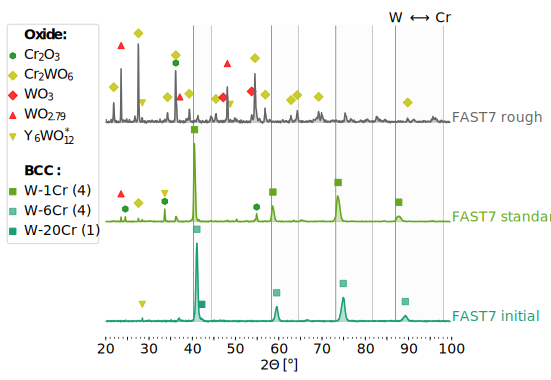

In [17]:
### dic_peaks = {} #open new dict where the name and peak data is filled in for later usage
dic_peaks = {}
# test print shoud be '_test' not '_'

# imports the look of the plot no border and the right x and y labels...
fig = plt.figure(facecolor='white')
ax = fig.add_subplot(111)
ax = plt.axes(frameon=False)
ax.set_frame_on(False)
ax.get_xaxis().tick_bottom()
ax.axes.get_yaxis().set_visible(False)#True for visible Y achses
ax.axes.get_xaxis().set_visible(True)
ax.set_xlabel(u'$2\,\Theta$ [°]')
#ax.set_ylabel(u'Intensity [a.u.]')

# make major tics base 5 and minor 1
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax.set_xlim(start,stop)

# get major ticks just with every second ticklabel:
new_ticks = ax.get_xticks().astype(int).astype(str)
new_ticks[::2] = ''
new_ticks
ax.set_xticklabels(new_ticks)

#start of oxide plot
for i in reversed(range(0,len(meas))):
    x_all = dataSets[i][:,0]
    x = x_all[(start < x_all) & (x_all < stop)]
    y=peakhight/sec[i]*(dataSets[i][(start <x_all) & (x_all<stop),1])+scale*i
    ax.plot(x,y,c=color[i])
    ax.fill(x, y, zorder=10,color=color[i],alpha=0.3)
    ax.text(stop, peakhight/sec[i]*(dataSets[i][100,1])+scale*i, name[i], color=color[i])#prints the name to the line
    ###################producing the lines area for The W-Cr BCC systems#################
    if (metal == True) & (oixdes == True):
        comun_shift = 0
    else:
        comun_shift = 1
    if metal == True:
        if i == len(meas)-1:#if non reversed set to 0 to plot as lowest part of the plot
            for j in range(len(W)):
                ax.vlines(W[j],0,(scale)*len(name)-6, lw=0.5,alpha=0.8)
                ax.fill_between([W[j], Cr[j] if Cr[j]<stop else stop],0,(scale)*len(name)-6, alpha=0.015, color='black')
            ax.text(W[-1-comun_shift],(scale)*len(name),'W',fontsize = 14, horizontalalignment='center')
            for j in range(len(Cr)-comun_shift):
                ax.vlines(Cr[j],0,(scale)*len(name)-6, lw=0.5, alpha=0.4)
            ax.text(Cr[-1-comun_shift],(scale)*len(name),'Cr',fontsize = 14, horizontalalignment='center')
            ax.text(W[-1-comun_shift]+(Cr[-1-comun_shift]-W[-1-comun_shift])/2,(scale)*len(name),\
                     u'\u27F7',fontsize = 14, horizontalalignment='center')#u'\u21C4'

            
    ## smoothing the data for the fit, makes fiitig more reliable:
    window = (len(x)/(stop-start))/Smooth   
    window = window if window%2 != 0 else window+1#checks is window is odd
    y_smooth = savgol_filter(y, window_length=window, polyorder=3)
    #===============================================================================================#
    #                      Fitting data from libary (oxies)                                         #
    #===============================================================================================#
    indexes = peakutils.indexes(y_smooth, thres=minpeak[i], min_dist=len(x)/peaknumber[i]) # , fontsize = 16 finding peak index position /max(y)
    peaks_x = peakutils.interpolate(x, y_smooth, ind=indexes, width=window)#gausian fit better presition
    #check if any peaks were lost and if get rid of them
    peaks_x = np.where(np.abs(peaks_x-x[indexes])>0.8,x[indexes],peaks_x)#checks if fit is off after interpolation by a sustancial amount.
    dic_peaks[name[i]] = peaks_x # fillS found peaks in to dic
    rel = peaks_x == peaks_x#takes all, in the list into consideration
    #avoids double fitting of oxide in the alloy zones, can be turned of for specific samples by adding to the list_of_none_metal
    if (metal == True) & (name[i] not in list_of_none_metal):
        rel = irrelevant(peaks_x)
        peaks_x = peaks_x[rel]
    if (oixdes==True) and (name[i] not in list_of_none_oxed):
        lab1 = '$\mathbf{Oxide:}$'
        ax.scatter(50, 100, c='w', alpha = 0, label = lab1 if lab1 not in plt.gca().get_legend_handles_labels()[1] else '')
        print '\n',name[i], 'oxide fit:',(name[i] not in list_of_none_oxed)
        for key in dic_keys:
            if (Folder == 'Bulk') or (Folder == 'WCr_WCrY'):#exception for bulk and...
                temp_index_ox = ox_index(peaks_x, dic[key], uncertanty=0.15)
            else:
                temp_index_ox = ox_index(peaks_x, dic[key])#, uncertanty=0.1) #<----- if comparison presicion should be reduced (not higher than 0.15)
            dic_array = np.array(dic[key])
            peak_array = peaks_x[temp_index_ox]
            #print (key, len(temp_index_ox))#, '{:.3f}'.format(np.abs(peak_array[ox_index(peak_array,dic[key])]-dic_array[ox_index(dic[key],peak_array)]).mean())
        
            if (len(temp_index_ox) >= 1):#<----------checks if array is empty=1, or filters for more than one peak if set to 2
                print'for', key
                ax.scatter(peaks_x[temp_index_ox],y[indexes][rel][temp_index_ox]+(0.1+dic_marker[key][2])*peakhight\
                               ,marker=dic_marker[key][0],color=dic_marker[key][1],s = 40,alpha=0.8, zorder=2\
                               ,label = key if key not in plt.gca().get_legend_handles_labels()[1] else '')
                               #label = checks if the key is already in the list of labels and so avoids double naming of labels

#plot metal or alloy
for i in reversed(range(0,len(meas))):
    x_all = dataSets[i][:,0]
    x = x_all[(start < x_all) & (x_all < stop)]
    y=peakhight/sec[i]*(dataSets[i][(start <x_all) & (x_all<stop),1])+scale*i
    print name[i]
    ## smoothing the data for the fit, makes fiitig more reliable:
    window = (len(x)/(stop-start))/Smooth   
    window = window if window%2 != 0 else window+1#checks is window is odd
    y_smooth = savgol_filter(y, window_length=window, polyorder=3)
    #==================================================================================#
    #              FIT/Plot concentrations... Vegard approximation                     #
    #==================================================================================#
    if (oixdes==True):#adds line break in case oxide is added in the legend on top
        emptyline = '\n'
    else:#no linebreak
        emptyline = ''
    if (metal == True) and (name[i] not in list_of_none_metal):
        # adds title for BCC phases in the legend
        lab2 = emptyline+'$\mathbf{BCC:}$'
        ax.scatter(50,100,c='w',alpha=0,label = lab2 if lab2 not in plt.gca().get_legend_handles_labels()[1] else '')
        ##making the fit on the smoothed data
        indexes = peakutils.indexes(y_smooth, thres=minpeak2[i]/peakhight, min_dist=len(x)/peaknumber2[i])
        #finding peak index position /max(y)
        peaks_x2 = peakutils.interpolate(x, y_smooth, ind=indexes, width=window)#gausian refit for better precision
        # if gausian fitting should not be applied add to list non_gausian_metal
        if name[i] in non_gausian_metal:
             peaks_x2 = x[indexes]
        peaks_x2 = np.where(np.abs(peaks_x2-x[indexes])>1.,x[indexes],peaks_x2)#check wrong fit
        aWCr = peak(peaks_x2)#calulating the lattice constant for the bcc phase
        x_reduced, yin = relevant(peaks_x2)# reducing all peaks to the relevant bcc ones  (here just metal)
        y_reduced = y[indexes[yin]]#same for peakhight
        colorX = color[i]
        inds =[] #pruce empty list to fill with indices for each bin (histogram) idividualy
        print len(aWCr),'{:.2}'.format(aWCr.std()),'standart deviation lattice constant'
        
        if aWCr.std()>0.004: #filtering if there are more than one cubic phase, only shown if 3 or more## turn off by increasing standdeviation
            #check length of a, and find proper spacing of bins
            print 'ON!!length{}'.format(len(aWCr)), np.sort(aWCr)#tells u that filtering is active
            #==================================================================================#
            #    increasing the number of bins till a reasonable amount of phases is found     #
            #==================================================================================#
            print 'frequency of phase peak',plane_count(peaks_x2)[0]
            print 'minimal number of phases',plane_count(peaks_x2)[1]
            bin_num = plane_count(peaks_x2)[1]
            while True:
                #creats bins which are used to filter the data (equivalent to a histogram)
                bins = np.linspace(aWCr.min(),aWCr.max()+0.00000001,bin_num)
                print 'len(bins)',len(bins), bins
                #creats temporary emtpy np.array in the right size
                counts = np.zeros_like(bins)
                # find the appropriate bin foreach a, right means right vlaue<bin index>bin-index
                k = np.searchsorted(bins, aWCr,side='right')
                # add one for every fitting value to a bin
                np.add.at(counts, k, 1)
                #counts maximal count
                frequency = counts.max()
                print 'frequency', frequency
                print counts
                # breaks if condition 1 and 2 is fullfilled
                if (frequency <= plane_count(peaks_x2)[0]) & ((counts>0).sum()  >= plane_count(peaks_x2)[1]):
                    break
                #increase bin number for better separetion
                bin_num += 1
            
            #creats array of lenght bins with the aproperiat index values of bins
            v_ = np.arange(len(bins))
            
            #checks at which bin index the count is higher than minmal_count 2(default or 1 for thinfilm samples) (so significant)
            vin =  v_[(counts>2)]
            
            #check if any True value is found
            if (((counts>2).sum() == False) or (minimal_count < 2)):
                vin =  v_[(counts>(1 if minimal_count == 2 else minimal_count))]#if not, reduce condition to more than 1
                print 'FILTERT with>{}'.format(1 if minimal_count == 2 else minimal_count), (counts>(1 if minimal_count == 2 else minimal_count))
            if name[i] in exeption:
                vin =  v_[(counts>0)]#if not, reduce condition to more than 1
                print 'FILTERT expection with=1,', (counts>0),vin
            for n in range(len(vin)):
                inds.append([k==vin[n]])    
        else:
            inds.append([aWCr==aWCr])
            vin  = list([True])
            print 'only one phase'
        #print 'inds',inds
        for n in reversed(range(len(vin))):
            atPerCr = 1.-(aWCr[inds[n]]-aCr)/(aW-aCr)#calculate at% Cr
            wtPerCr = atPerCr*atomicMassCr/(atomicMassW*(1-atPerCr)+atPerCr*atomicMassCr)# wt%Cr
            ax.scatter(x_reduced[inds[n]],y_reduced[inds[n]]+0.18*peakhight, s=40, marker='s'\
                    ,color = color[i], alpha = len(vin)/(len(vin)+float(n)), zorder=2\
                    ,label = 'W-{:.0f}Cr \t({})'.format(abs(wtPerCr.mean())*100, len(wtPerCr)))
    print '\n'
ax.legend(handlelength=0, bbox_to_anchor=(0.0, 0.98), ncol=1, mode=None)

print Folder
#For last pt make '_' for testing '_test'
test = '_test'
print '%s/06_XRD%snew%s'%(Folder,test,Folder)
#saving the Fit with or without test variable
plt.savefig('%s/06_XRD%snew%s.svg'%(Folder,test,Folder), bbox_inches = 'tight', transparent=True)#saves the fig in chooesen format
plt.savefig('%s/06_XRD%snew%s.pdf'%(Folder,test,Folder), bbox_inches = 'tight', transparent=True)#bbox_inches ='
plt.savefig('%s/06_XRD%snew%s.png'%(Folder,test,Folder), bbox_inches = 'tight', transparent=True,dpi = 300)#bbox_inches ='

# End
Here the fitting parameters can be tested if they are reasonably well for the Folder

In [14]:
#uncertanty=0.15
#print (dic_peaks['W-10.3Cr'][ox_index(dic_peaks['W-10.3Cr'],dic['W$_{8}$O$_{21}^*$'])]- dic['W$_{8}$O$_{21}^*$'][ox_index(dic['W$_{8}$O$_{21}^*$'], dic_peaks['W-10.3Cr'])]).mean()
#ox_index(dic_peaks['W-11.4Cr-0.6Y'],dic['WO$_3$'])#W$_{8}$O$_{21}^*$
#dic['Cr$_2$WO$_6$'][ox_index(dic['Cr$_2$WO$_6$'],dic_peaks['W-13.5Cr-0.7Y'])]

In [15]:
plane_count(peaks_x2)
print 'maximal_frequency of peaks per plan', plane_count(peaks_x2)[0]
print 'minimal number of bin', plane_count(peaks_x2)[1]

maximal_frequency of peaks per plan 4
minimal number of bin 2


### testing

In [24]:
#rouding based Fitting---> slower but little more stable
def index_round(peaks_x,ox,dec = 1):
    peaks_x = np.array(peaks_x)
    ox = np.array(ox)
    a = np.round(peaks_x, decimals = dec)
    b = np.round(ox, decimals = dec)
    c = np.isin(a,b)
    d = np.isin(b,a)
    return c

a = np.array([1.131,2.2009,3.321,3.8,4.12,4.3,4.94])
b = a + 0.12

unc = 0.12
print 'a', a
print 'b', b
print 'ox_index'
print a[ox_index(a,b,unc)]
print b[ox_index(b,a,unc)]
print 'index_round'
print a[index_round(a,b,0)]
print b[index_round(b,a,0)]

a [1.131  2.2009 3.321  3.8    4.12   4.3    4.94  ]
b [1.251  2.3209 3.441  3.92   4.24   4.42   5.06  ]
ox_index
6 peaks do unknown uncertantiy, may high strain, check?
[1.131  2.2009 3.321  3.8    4.3    4.94  ]
6 peaks do unknown uncertantiy, may high strain, check?
[1.251  2.3209 3.441  3.92   4.24   5.06  ]
index_round
[1.131  2.2009 3.321  3.8    4.12   4.3    4.94  ]
[1.251  2.3209 3.441  3.92   4.24   4.42   5.06  ]


## Reading in data directly from a database (not finished)

In [18]:
import requests

def get_api_key(api_key):
    '''Returns the string stored in the file with the path "api_key" '''
    try:
        with open(api_key) as inputFileHandle:
            return inputFileHandle.read()[:-1]#-1 to get ride of the new line '\n'
    except IOError:
        sys.stderr.write('api_key - Error: Could not open {}, check if it is there?\n'.format(api_key))
        sys.exit(-1)

In [19]:
r = requests.get('https://www.materialsproject.org/rest/v1/materials/Fe2O3/vasp', params= {'API_KEY': get_api_key('daten_bank/key')})

In [ ]:
#r.content